In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import gmaps
from scipy import stats

In [2]:
df_merge3 = pd.read_csv("college-salaries/clean_data.csv")

In [3]:
df_merge3["Bin"] = pd.qcut(df_merge3["Early Career"], 4, labels = ["low","mid-low","mid-high","high"])

In [4]:
df_merge3.loc[:,["Early Career","Bin"]].head()

,Early Career,Bin
0,46200,mid-high
1,46000,mid-high
2,54200,high
3,38300,low
4,49000,mid-high


In [5]:
df_merge3.groupby("Bin")["ADM_RATE_ALL"].mean()

Bin
low         0.668925
mid-low     0.697629
mid-high    0.677267
high        0.550586
Name: ADM_RATE_ALL, dtype: float64

In [6]:
df_cip = pd.melt(df_merge3,"Bin",df_merge3.iloc[:,24:61])

In [7]:
df_cip2 = df_cip.groupby(["Bin","variable"]).mean().sort_values("value", ascending = False).reset_index()

df_cip2.head()

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
1,mid-low,"Business, Management, and Marketing",0.191097
2,mid-high,"Business, Management, and Marketing",0.182257
3,high,Health Professions,0.149739
4,high,"Business, Management, and Marketing",0.144208


In [8]:
df_cip2[df_cip2["Bin"] == "low"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
7,low,Health Professions,0.113787
10,low,Education,0.089137
19,low,Psychology,0.061702
20,low,"Liberal Arts and Sciences, General Studies and...",0.058858
24,low,"Homeland Security, Law Enforcement and Firefig...",0.049685
25,low,Visual/Performing Arts,0.049480
28,low,Theology and Religious Vocations,0.048498
30,low,Biological and Biomedical Studies,0.046825
36,low,"Parks, Recreation, Leisure, and Fitness Studies",0.035594


In [11]:
df_cip2[df_cip2["Bin"] == "high"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
3,high,Health Professions,0.149739
4,high,"Business, Management, and Marketing",0.144208
8,high,Engineering,0.103902
9,high,Social Sciences,0.096832
14,high,Biological and Biomedical Studies,0.067919
22,high,Psychology,0.052085
29,high,Visual/Performing Arts,0.047965
37,high,Communication and Journalism,0.034752
39,high,Computer and Information Sciences and Support ...,0.033267
45,high,English Language and Literature/Letters,0.025701


C:\Users\PhoenixJauregui\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


47156.98587127159
46200.0


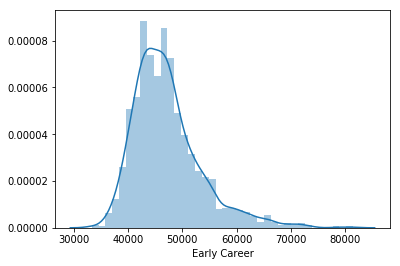

In [19]:
sb.distplot(df_merge3["Early Career"])

print(df_merge3["Early Career"].mean())
print(df_merge3["Early Career"].median())

plt.savefig("dist.png")

plt.show()

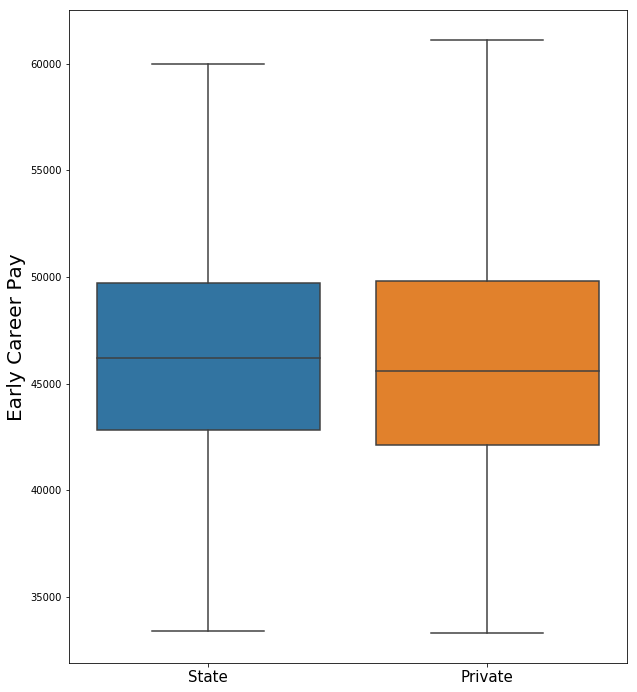

In [13]:
fig = plt.figure(figsize=(10,12))

schoolCat= []

for x in range(len(df_merge3["School Type"])):
    if "Private" in df_merge3["School Type"][x]:
        schoolCat.append("Private")
    elif "State" in df_merge3["School Type"][x]:
        schoolCat.append("State")
    else:
        schoolCat.append("Other")


sb.boxplot(x = schoolCat,y = df_merge3["Early Career"], showfliers = False)

plt.savefig("box.png")

plt.xticks(fontsize = 15)
plt.ylabel("Early Career Pay",fontsize = 20)

plt.show()

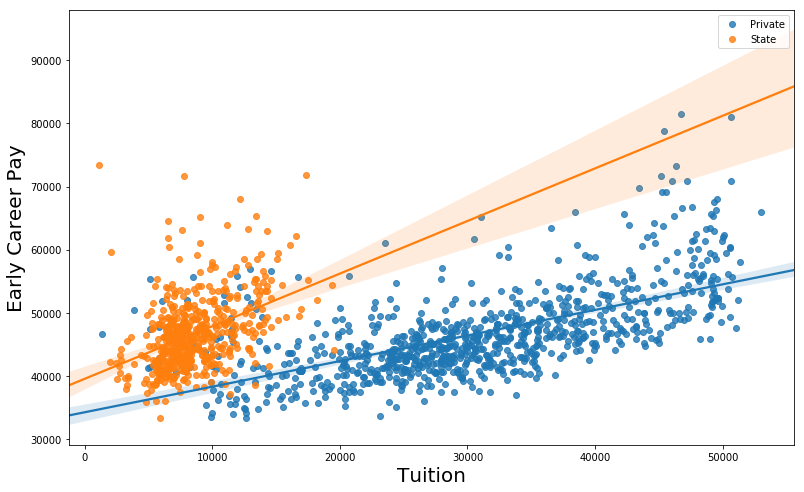

In [14]:
df_merge3["School Category"] = schoolCat

fig = plt.figure(figsize = (13,8))

plot = sb.regplot(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"], label = "Private")
plot = sb.regplot(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"], label = "State")

plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career Pay", fontsize = 20)

plt.legend()

plt.savefig("regplot.png")

plt.show()

In [15]:
df_merge3 = df_merge3.dropna()

print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"]))
print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"]))

LinregressResult(slope=0.45009483486763685, intercept=32569.462133631507, rvalue=0.6389105973156414, pvalue=2.3269115744038015e-90, stderr=0.019466957888892827)
LinregressResult(slope=0.829426501485647, intercept=39745.02504727941, rvalue=0.388895125922407, pvalue=2.158488395039148e-19, stderr=0.08831519023981586)


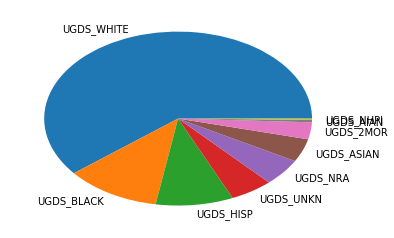

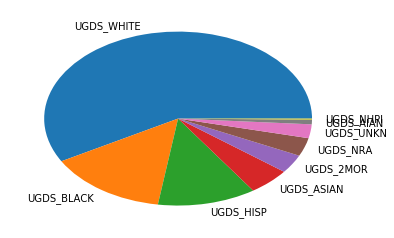

In [16]:
df_ugds = pd.melt(df_merge3,["School Category"],df_merge3.iloc[:,62:71])

df_ugds2 = df_ugds.groupby(["School Category","variable"]).mean().sort_values("value", ascending = False).reset_index()

plt.pie(x = df_ugds2[df_ugds2["School Category"] == "Private"]["value"],labels = df_ugds2[df_ugds2["School Category"] == "Private"]["variable"])
plt.show()

plt.pie(x = df_ugds2[df_ugds2["School Category"] == "State"]["value"],labels = df_ugds2[df_ugds2["School Category"] == "State"]["variable"])
plt.show()

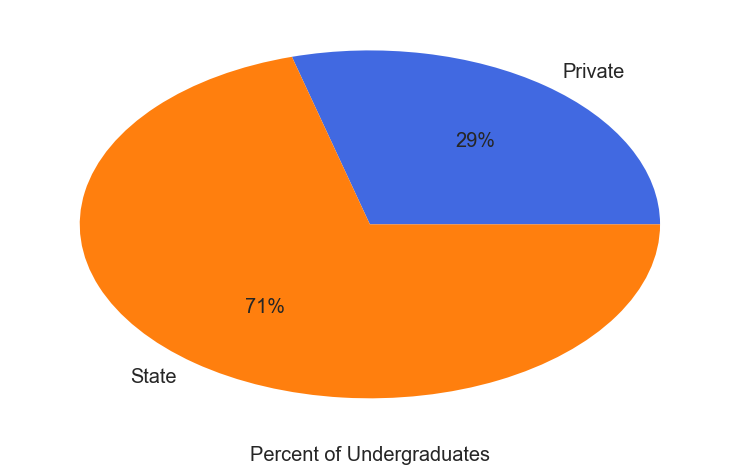

In [44]:
fig = plt.figure(figsize=(13,8))

df_merge3.groupby("School Category")["UGDS"].sum().plot(kind = "PIE", colors = ["royalblue","#ff7f0e"], textprops={'fontsize': 20}, autopct='%1.0f%%')

plt.ylabel("", fontsize = 20)
plt.xlabel("Percent of Undergraduates",fontsize = 20)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation = 360, fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.savefig("pie.png")

plt.show()

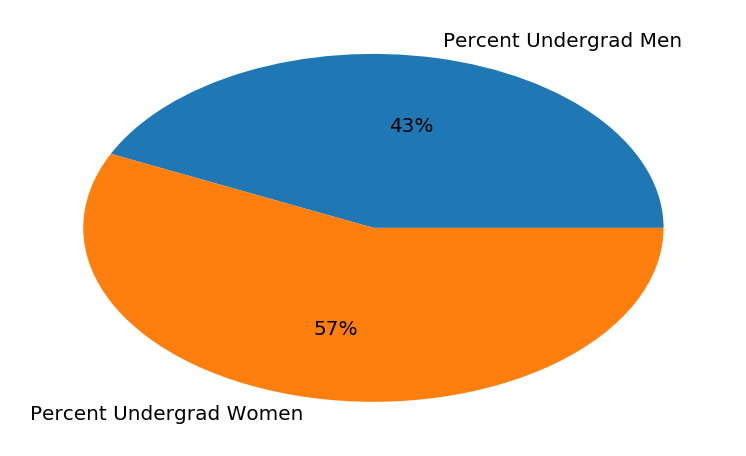

In [17]:
fig = plt.figure(figsize=(13,8))

df_demo = pd.melt(df_merge3,["School Category"],df_merge3.iloc[:,84:86])

df_demo.groupby(["variable"])["value"].sum().plot(kind = "pie", autopct='%1.0f%%', textprops={'fontsize': 20})

plt.ylabel("", fontsize = 20)

plt.savefig("pie2.png")

plt.show()